<a href="https://colab.research.google.com/github/Vanessa-Helena/PDI_ProcessamentoDeImagensDigitais/blob/main/Aula_10_PDI_Filtros_de_Realce_ExerciciosResolvidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 10**

*Profa. Ana Paula*

# **Filtros de Realce**

O procedimento de filtragem em imagens possui duas outras aplicações tão importantes quanto o tratamento de ruído:

*   Extração de características
*   Realce de arestas, bordas ou contornos em imagens.

Tem como objetivo:

*   Enfatizar detalhes finos numa imagem
*   Realçar detalhes que tenham sido borrados

### Importando bibliotecas

In [1]:
!pip install -U scikit-image

     |████████████████████████████████| 29.2MB 103kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.16.2
    Uninstalling scikit-image-0.16.2:
      Successfully uninstalled scikit-image-0.16.2


In [2]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
from skimage.io import imread
from skimage.filters import roberts, sobel, prewitt
import numpy as np
import argparse
from google.colab import files

Carregando as imagens

In [ ]:
uploaded = files.upload()

Saving lena.jpg to lena.jpg


In [ ]:
# COLOCANDO O DIRETORIO DO COLAB ONDE A IMAGEM ESTÁ
#!wget "/content/drive/My Drive/PDI"
# LISTANDO O DIRETÓRIO PARA TER CERTEZA SOBRE AS IMAGENS
#!ls
#CARREGANDO A IMAGEM
img = cv2.imread('lena.jpg')
img = cv2.cvtColor(img,cv2.cv2.COLOR_BGR2RGB)

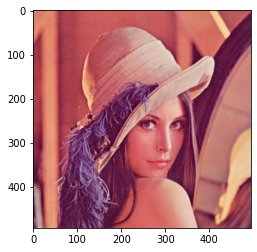

In [ ]:
plt.imshow(img)

## ***Detector de Borda - Laplaciano***

O operador Laplaciano é um dos mais populares e usados para realçar bordas. Assim como o operador de Sobel, o laplaciano também é um filtro espacial. Ele possui uma máscara de ordem 3 que pecorre toda a imagem alterando o pixel-alvo pela média ponderada dos pixels vizinhos, e depois eleva ao quadrado obtido.

O operador laplaciano tende a produzir bordas mais finas comparado ao filtro de Sobel, entretanto, também é muito sensível a ruídos.


FUNÇÃO LAPLACIANO
```
-------------------------------------------------------------------------------
Função Laplacian(img, var_arm)
-------------------------------------------------------------------------------
Entrada: | img --> imagem que será utilizada
         |var_arm --> Valor que representa o pixel.
---------|--------------------------------------------------------------------- 
Saída    |  Matriz referente com realce do filtro Laplaciano
-------------------------------------------------------------------------------
```

In [ ]:
imgLap = cv2.Laplacian(img, cv2.CV_8U)

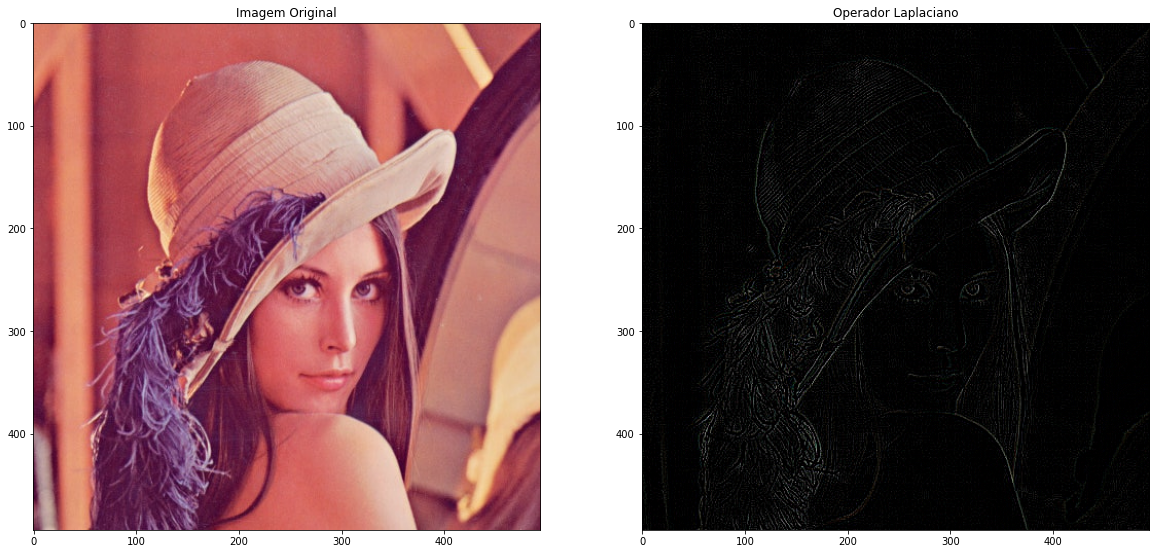

In [ ]:
fig = plt.figure(figsize=(20,50))

ax1 = fig.add_subplot(121)
plt.imshow(img)
plt.title("Imagem Original")

ax2 = fig.add_subplot(122)
plt.imshow(imgLap)
plt.title("Operador Laplaciano")

plt.show()

Os métodos vistos fornecem bordas com largura de vários pixels e não detectam bordas em regiões da imagem com menor contraste

## ***Detector de Bordas - Sobel***

O operador de Sobel realiza uma operação para realçar contornos em imagens. Esse tipo de filtro é não linear e realça linhas verticais e horizontais mais escuras que o fundo, sem realçar pontos isolados.

Além dessa características, o detector de sobel possibilita realçar as arestas independente da direção: a filtragem pode ser realizada tanto vertical quanto horizontalmente.

As regiões destacadas por esse procedimento resultam em bordas mais "grossas" comparadas as outras técnicas.

FUNÇÃO SOBEL
```
-------------------------------------------------------------------------------
Função sobel(img, var_arm, h, v, máscara)
-------------------------------------------------------------------------------
Entrada: | img --> imagem que será utilizada
         | var_arm --> Valor que representa o pixel
         | h --> Realce horizontal
         | v --> Realce vertical            
         | máscara -->dimensão da máscara que será aplicada
---------|--------------------------------------------------------------------- 
Saída    |  Matriz referente a imagem do filtro Sobel
-------------------------------------------------------------------------------
```
1. O primeiro parêmetro é a imagem que receberá o tratamento; 
2. O segundo refere-se ao tipo de variável que armazenará o valor que representa o pixel. 
> Quando o valor do segundo parâmetro é definido como cv2.CV_8U, os pixels são tratados como valores inteiros, entre 0 a 255, e armazenados em 8 bytes.
3. O terceiro e quarto parâmetro definem como o realce será aplicado. 
> Quando o terceiro parâmetro é igual 1 e o quarto igual a 0, o realce ocorrerá na direção horizontal; do contrário, na direção vertical. 
4. O quinto, e último, parâmetro é o tamanho da máscara de filtragem. 
> Seu valor deve ser um número inteiro, ímpar, preferencialmente 1, 3, 5 ou 7.



In [ ]:
sobelx = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=5)
sobelxy = cv2.Sobel(img, cv2.CV_8U, 1, 1, ksize=5)

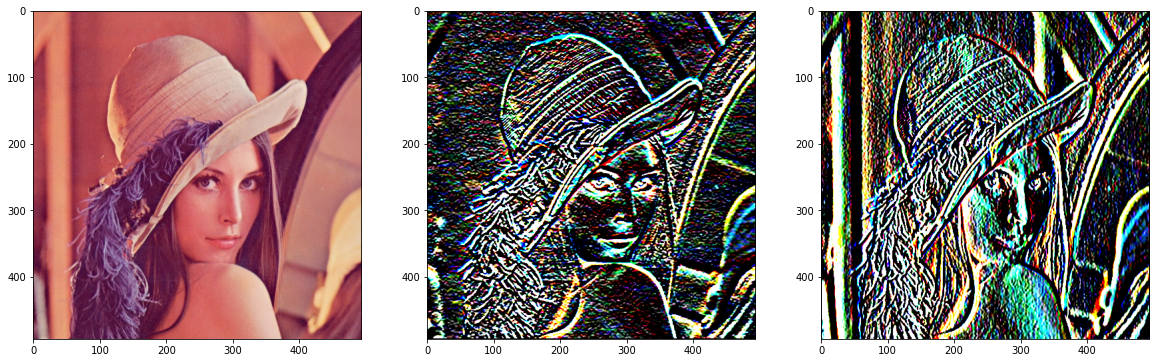

In [ ]:
fig = plt.figure(figsize=(20,50))

ax1 = fig.add_subplot(131)
plt.imshow(img)

ax2 = fig.add_subplot(132)
plt.imshow(sobelx)

ax3 = fig.add_subplot(133)
plt.imshow(sobely)

plt.show()

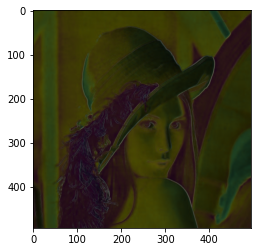

In [ ]:
#img1 = imread('predio.JPG', as_gray=True)
#imgSobel = sobel(img)
#plt.imshow(imgSobel, cmap=plt.cm.gray)
imgSobel = sobel(img)
plt.imshow(imgSobel)

## ***Detector de Bordas - Roberts***

Um dos primeiros filtros desenvolvidos. Não é muito utilizado devido oo seu resultado não ser tão eficiente.



FUNÇÃO ROBERTS
```
-------------------------------------------------------------------------------
Função Roberts(img)
-------------------------------------------------------------------------------
Entrada: | img --> imagem que será utilizada                  
---------|--------------------------------------------------------------------- 
Saída    |  Matriz referente a imagem com realce do filtro Roberts
-------------------------------------------------------------------------------
```

In [ ]:
#img1 = imread('predio.JPG', as_gray=True)
#img1 = imread('predio.JPG', as_gray=True)
img1 = imread('lena.jpg', as_gray=True)
imgRoberts = roberts(img1)

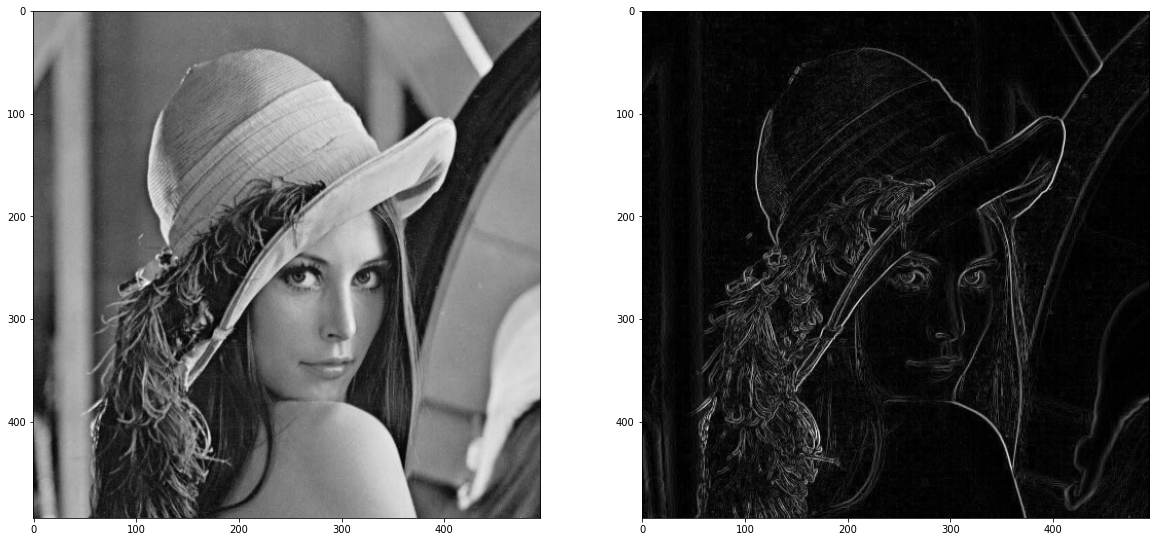

In [ ]:
fig = plt.figure(figsize=(20,50))
ax1 = fig.add_subplot(121)
plt.imshow(img1, cmap=plt.cm.gray)

ax2 = fig.add_subplot(122)
plt.imshow(imgRoberts, cmap=plt.cm.gray)
plt.show()

## ***Filtro Prewitt***

O filtro de Prewitt tem o mesmo conceito do de Sobel (sem o peso para o pixel mais central) e de Roberts (sua máscara abrange uma área de 3 x 3).


FUNÇÃO PREWITT
```
-------------------------------------------------------------------------------
Função prewitt(img)
-------------------------------------------------------------------------------
Entrada: | img --> imagem que será utilizada                   
---------|--------------------------------------------------------------------- 
Saída    |  Matriz referente com realce do filtro Prewitt
-------------------------------------------------------------------------------
```

In [ ]:
imgPrewitt = prewitt(img1)

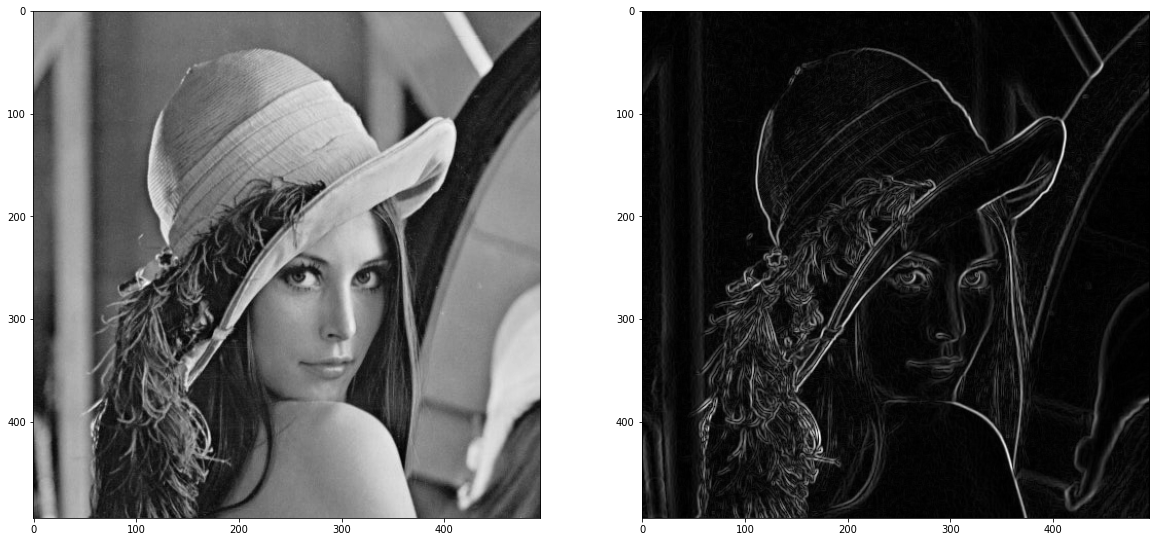

In [ ]:
fig =  plt.figure(figsize=(20,50))
ax1 = fig.add_subplot(121)
plt.imshow(img1, cmap=plt.cm.gray)

ax2 = fig.add_subplot(122)
plt.imshow(imgPrewitt, cmap=plt.cm.gray)

plt.show()

# Detector de bordas - CANNY

O detector de bordas por canny é um dos mais eficientes algoritmos para detectar bordas em imagens. Esse tipo de detector de bordas deve respeitar três características principais.

1. O algoritmo deve ser capaz de identificar todas as bordas possíveis.
2. Todas as bordas detectadas devem estar próximas das bordas originais.
3. Bordas falsas não podem ser criadas, ou seja, cada borda deve ser definida uma única vez.

Possui processamento adicional:
1. Estimativa da direção da borda (Ed);

2. Estimativa do contraste da borda (Es);

3. Remoção dos pixels extras na direção normal à da borda (Ed);

4. Limiarização com histerese.

FUNÇÃO Canny
```
-------------------------------------------------------------------------------
Função Canny (img, int_detc1, int_detc2)
-------------------------------------------------------------------------------
Entrada: | img --> imagem que será utilizada
         |int_detc1 --> intensidade de detecção 1.
         |int_detc2 --> intensidade de detecção 1.
---------|--------------------------------------------------------------------- 
Saída    |  Matriz referente com realce do filtro Canny
-------------------------------------------------------------------------------
```

In [ ]:
imgCanny = cv2.Canny(img, 0, 100)

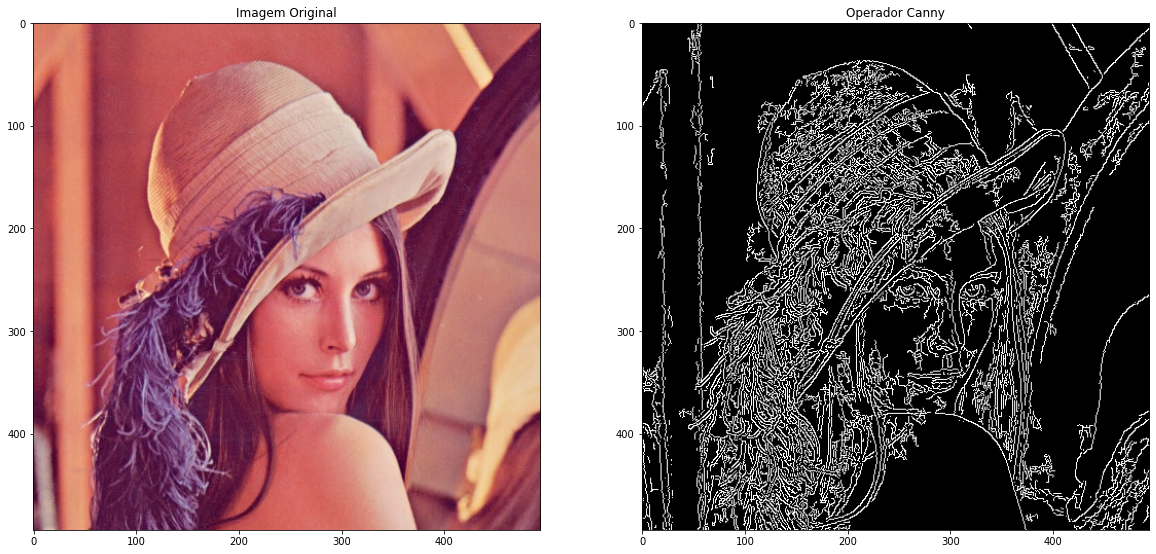

In [ ]:
fig = plt.figure(figsize=(20,50))

ax1 = fig.add_subplot(121)
plt.imshow(img,  cmap=plt.cm.gray)
plt.title("Imagem Original")

ax2 = fig.add_subplot(122)
plt.imshow(imgCanny,  cmap=plt.cm.gray)
plt.title("Operador Canny")

plt.show()

# Exercícios

1) Detecte as bordas de 3 tipos de imagens (Satelite, Médica e um animal todas em níveis de cinza) usando os seguintes métodos:

a) Sobel

b) Prewitt

c) Roberts

d) Canny

2) Qual dos quatro Métodos gerou os melhores resultados? 

3) Os resultados do melhor filtro foi igual para todas as imagens?

4) Vimos que o operador Canny para obter bom resultados utiliza uma sequencia de passos no seu algoritmo. Um desses passos é a utilização de um filtro de suavização Gaussiana na imagem, antes da detecção de bordas. Desta forma, aplique um filtro de suavização Gaussiana nas imagens e passe os filtros Sobel, Prewitt e Roberts. Analise os resultados comparando-os ao resultado do filtro de Canny. 

5) Desafio - Fazer a detecção de bordas em imagens RGB (Exercício valendo 0.5 na média).

# Exercícios
>### Resolução 

## 1) Detecte as bordas de 3 tipos de imagens (Satelite, Médica e um animal todas em níveis de cinza) usando os seguintes métodos:

###a) **Sobel**

In [ ]:
Satelite

In [97]:
uploaded = files.upload()

Saving Satelite.jpeg to Satelite (1).jpeg


In [98]:
satelite = cv2.imread('Satelite.jpeg', cv2.IMREAD_UNCHANGED)
sateliteBgr = cv2.cvtColor(satelite,cv2.COLOR_BGR2RGB)
sateliteGray = cv2.cvtColor(sateliteBgr,cv2.COLOR_RGB2GRAY)

In [99]:
sateliteSobel = cv2.Sobel(sateliteGray, cv2.CV_8U, 1, 1, ksize=5)
sateliteSodel1 = sobel(sateliteGray)

<function matplotlib.pyplot.show>

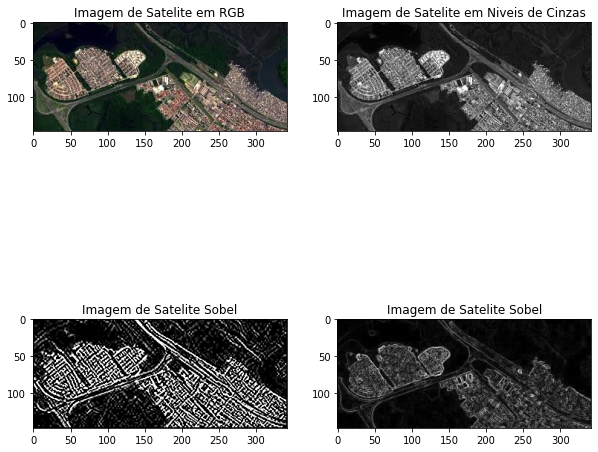

In [100]:
fig = plt.figure(figsize=(10,10))

um = fig.add_subplot(221)
plt.imshow(sateliteBgr, cmap='gray')
plt.title('Imagem de Satelite em RGB')

um = fig.add_subplot(222)
plt.imshow(sateliteGray, cmap='gray')
plt.title('Imagem de Satelite em Niveis de Cinzas')

um = fig.add_subplot(223)
plt.imshow(sateliteSobel, cmap='gray')
plt.title('Imagem de Satelite Sobel')

um = fig.add_subplot(224)
plt.imshow(sateliteSodel1, cmap='gray')
plt.title('Imagem de Satelite Sobel')

plt.show

In [101]:
Médica 

NameError: ignored

In [ ]:
uploaded = files.upload()

In [ ]:
medica = cv2.imread('TCGA_CS_4941_19960909_4.tif', cv2.IMREAD_UNCHANGED)
medicaBgr = cv2.cvtColor(medica,cv2.COLOR_BGR2RGB)
medicaGray = cv2.cvtColor(medicaBgr,cv2.COLOR_RGB2GRAY)

In [ ]:
medicaSobel = cv2.Sobel(medicaGray, cv2.CV_8U, 1, 1, ksize=5)
medicaSodel1 = sobel(medicaGray)

In [ ]:
fig = plt.figure(figsize=(8,8))

um = fig.add_subplot(221)
plt.imshow(medicaBgr, cmap='gray')
plt.title('Imagem de Medica em RGB')

um = fig.add_subplot(222)
plt.imshow(medicaGray, cmap='gray')
plt.title('Imagem de Medica em Niveis de Cinzas')

um = fig.add_subplot(223)
plt.imshow(medicaSobel, cmap='gray')
plt.title('Imagem de Medica Sodel')

um = fig.add_subplot(224)
plt.imshow(medicaSodel1, cmap='gray')
plt.title('Imagem de Medica Sodel')

plt.show

In [ ]:
Animal

In [ ]:
uploaded = files.upload()

In [ ]:
animal = cv2.imread('animal.jpeg', cv2.IMREAD_UNCHANGED)
animalBgr = cv2.cvtColor(animal,cv2.COLOR_BGR2RGB)
animalGray = cv2.cvtColor(animalBgr,cv2.COLOR_RGB2GRAY)

In [ ]:
animalSobel = cv2.Sobel(animalGray, cv2.CV_8U, 1, 1, ksize=5)
animalSodel1 = sobel(animalGray)

In [ ]:
fig = plt.figure(figsize=(15,15))

um = fig.add_subplot(221)
plt.imshow(animalBgr, cmap='gray')
plt.title('Imagem de Animal em RGB')

um = fig.add_subplot(222)
plt.imshow(animalGray, cmap='gray')
plt.title('Imagem de Animal em Niveis de Cinzas')

um = fig.add_subplot(223)
plt.imshow(animalSobel, cmap='gray')
plt.title('Imagem de Animal Sobel')

um = fig.add_subplot(224)
plt.imshow(animalSodel1, cmap='gray')
plt.title('Imagem de Animal Sobel')

plt.show

###b) **Prewitt**

Satélite

In [ ]:
satelitePrewitt = prewitt(sateliteGray)
plt.imshow(satelitePrewitt, cmap=plt.cm.gray)

Médica

In [ ]:
medicaPrewitt = prewitt(medicaGray)

In [ ]:
plt.imshow(medicaPrewitt, cmap=plt.cm.gray)

Animal

In [ ]:
animalPrewitt = prewitt(animalGray)
plt.imshow(animalPrewitt, cmap=plt.cm.gray)


### c) **Roberts**


Satelite

In [ ]:
sateliteRoberts = roberts(sateliteGray)
plt.imshow(sateliteRoberts, cmap=plt.cm.gray)

Medica

In [ ]:
medicaRoberts = roberts(medicaGray)
plt.imshow(medicaRoberts, cmap=plt.cm.gray)

Animal

In [ ]:
animalRoberts = roberts(animalGray)
plt.imshow(animalRoberts, cmap=plt.cm.gray)

### d) **Canny**

Satelite

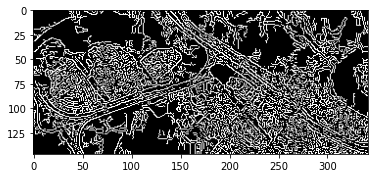

In [123]:
sateliteCanny = cv2.Canny(sateliteGray, 0, 80)
plt.imshow(sateliteCanny, cmap=plt.cm.gray)

Medica

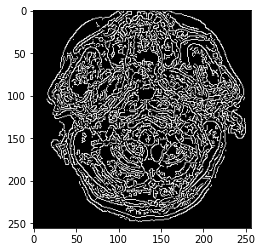

In [122]:
medicaCanny = cv2.Canny(medicaGray, 0, 80)
plt.imshow(medicaCanny, cmap=plt.cm.gray)

Animal

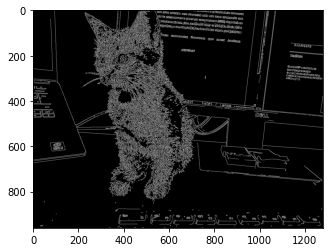

In [121]:
animalCanny = cv2.Canny(animalGray, 50, 80)
plt.imshow(animalCanny, cmap=plt.cm.gray)

## 2) Qual dos quatro Métodos gerou os melhores resultados? 



### *A técnica que gerou melhor resultado na minha opnião foi a Sobel porque ela fez os contornos das imagens sem escurecer tato quanto as outras e mantendo a visibilidade do que a imagem se trata.*

# 3) Os resultados do melhor filtro foi igual para todas as imagens?



### *Não, ela apresentou um resultado mais interesante na imagem médica, os contornos foram mais suaves e a imagem não ficou tão escura, achei a visualização melhor*

# 4) Vimos que o operador Canny para obter bom resultados utiliza uma sequencia de passos no seu algoritmo. Um desses passos é a utilização de um filtro de suavização Gaussiana na imagem, antes da detecção de bordas. Desta forma, aplique um filtro de suavização Gaussiana nas imagens e passe os filtros Sobel, Prewitt e Roberts. Analise os resultados comparando-os ao resultado do filtro de Canny. 



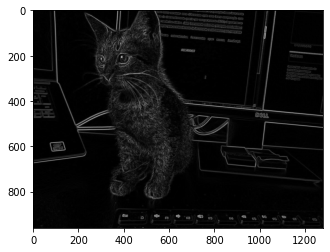

In [91]:
animalGassiana = cv2.GaussianBlur(animalGray, ( 3, 3), 0)
animalSodelGassiana = sobel(animalGassiana)
plt.imshow(animalSodelGassiana, cmap='gray')

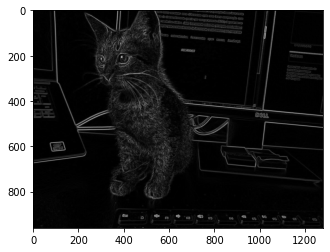

In [92]:
animalPrewittGassiana = sobel(animalGassiana)
plt.imshow(animalPrewittGassiana, cmap='gray')

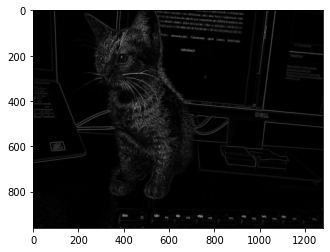

In [93]:
animalRobertsGassiana = roberts(animalGray)
plt.imshow(animalRobertsGassiana, cmap='gray')

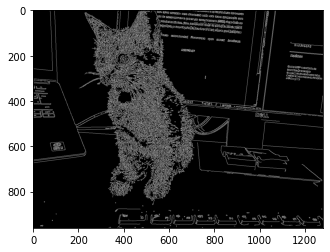

In [95]:
animalCannyGassiana = cv2.Canny(animalGray, 40, 80)
plt.imshow(animalCannyGassiana, cmap='gray')

*Comparação: Apesar de com o filtro Canny ser possivel exergar melhor a imagem, ele perde qualidade de nitidez em relação aos outros filtros, os outros apresentam a imagem com maior riqueza de detalhes*

# 5) Desafio - Fazer a detecção de bordas em imagens RGB (Exercício valendo 0.5 na média).

####Satélite

Sobel

In [108]:
sateliteSodelRGB = sobel(sateliteBgr)

Prewitt

In [109]:
satelitePrewittRGB = prewitt(sateliteBgr)

Roberts

In [120]:
im = cv2.imread('Satelite.jpeg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
ngcm= greycomatrix(im, [1], [0], 256, symmetric=False, normed=True)
sateliteRobertsRGB = roberts(ngcm)

NameError: ignored

Canny

In [125]:
sateliteCannyRGB = cv2.Canny(sateliteBgr, 0, 100)

<function matplotlib.pyplot.show>

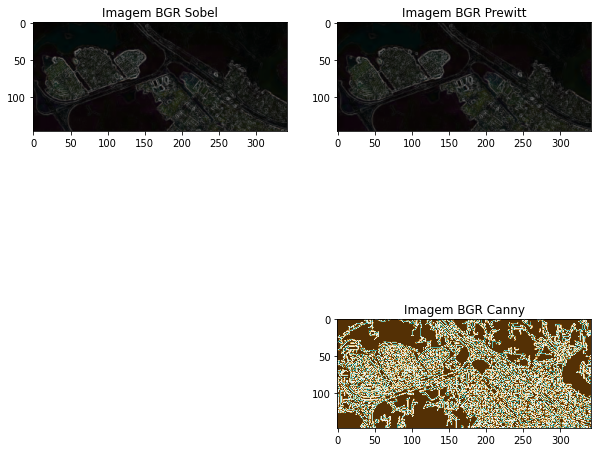

In [132]:
fig = plt.figure(figsize=(10,10))

um = fig.add_subplot(221)
plt.imshow(sateliteSodelRGB, cmap='BrBG')
plt.title('Imagem BGR Sobel')

um = fig.add_subplot(222)
plt.imshow(satelitePrewittRGB, cmap='BrBG')
plt.title('Imagem BGR Prewitt')

# um = fig.add_subplot(223)
# plt.imshow(sateliteRobertsRGB, cmap='gray')
# plt.title('Imagem BRG Roberts')

um = fig.add_subplot(224)
plt.imshow(sateliteCannyRGB, cmap='BrBG')
plt.title('Imagem BGR Canny')

plt.show

####Animal

Sobel

Prewitt

Roberts

Canny

In [ ]:
fig = plt.figure(figsize=(10,10))

um = fig.add_subplot(221)
plt.imshow(sateliteBgr, cmap='gray')
plt.title('Imagem de Satelite em RGB')

um = fig.add_subplot(222)
plt.imshow(sateliteGray, cmap='gray')
plt.title('Imagem de Satelite em Niveis de Cinzas')

um = fig.add_subplot(223)
plt.imshow(sateliteSobel, cmap='gray')
plt.title('Imagem de Satelite Sobel')

um = fig.add_subplot(224)
plt.imshow(sateliteSodel1, cmap='gray')
plt.title('Imagem de Satelite Sobel')

plt.show

In [ ]:
Anima

####Medica

Sobel

Prewitt

Roberts

Canny

In [ ]:
fig = plt.figure(figsize=(10,10))

um = fig.add_subplot(221)
plt.imshow(sateliteBgr, cmap='gray')
plt.title('Imagem de Satelite em RGB')

um = fig.add_subplot(222)
plt.imshow(sateliteGray, cmap='gray')
plt.title('Imagem de Satelite em Niveis de Cinzas')

um = fig.add_subplot(223)
plt.imshow(sateliteSobel, cmap='gray')
plt.title('Imagem de Satelite Sobel')

um = fig.add_subplot(224)
plt.imshow(sateliteSodel1, cmap='gray')
plt.title('Imagem de Satelite Sobel')

plt.show